In [40]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import gradient_descent as gd  # Assuming you have a custom gradient descent module
import logistic_regression as logreg

# Load the dataset
df = pd.read_csv("diabetes_preprocessed.csv")

# Separate features and target variable
X = df.drop(columns="Outcome").values  # 'Outcome' is the target variable
y = df["Outcome"].values

# Add an intercept term to X
X = np.c_[np.ones(X.shape[0]), X]  # Adds a column of ones for the intercept

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2024)

# Initialize model parameters
initial_beta = np.zeros(X_train.shape[1])

/Users/sophiag/Documents/Dokumente/Studium/Master/FS3/ML/ML24UiO/Project3/Sourcecode/logistic_regression.py:6: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-z))


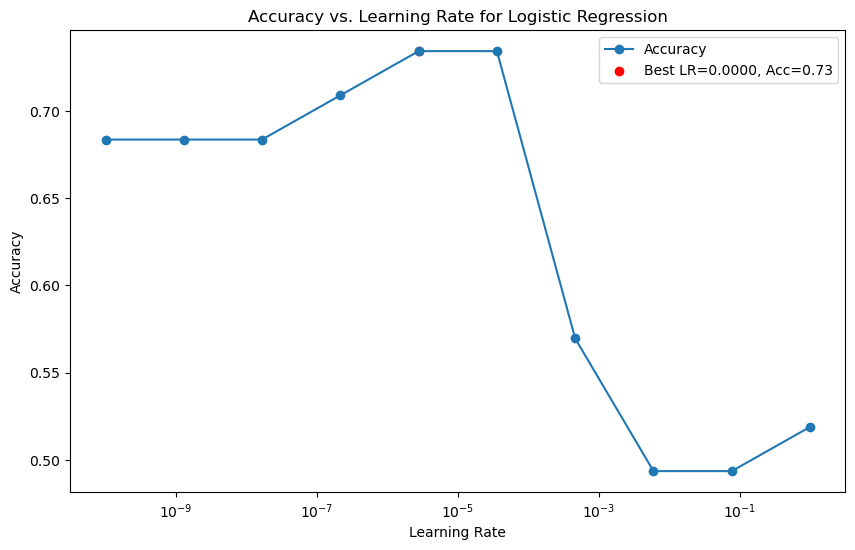

In [62]:
### Accuracy vs Learning rate ###

# Define a range of learning rates to test
learning_rates = np.logspace(-10, 0, 10)  # from 0.0001 to 1
n_iterations = 1000  # Number of epochs
accuracies = []

best_accuracy = 0
best_learning_rate = 0

# Loop through learning rates, train the model, and calculate accuracy
for lr in learning_rates:
    initial_beta = np.zeros(X_train.shape[1])
    beta_gd = gd.stochastic_gradient_descent(
        X_train, y_train, initial_beta,
        learning_rate=lr,
        n_iterations=n_iterations,
        model=logreg.logistic_gradient,
        batch_size=batch_size,
        lmbda=lmbda
    )
    y_pred_test = logreg.predict(X_test, beta_gd)
    accuracy = logreg.calculate_accuracy(y_test, y_pred_test)
    accuracies.append(accuracy)

    # Update the best accuracy and learning rate if this is the highest so far
    if accuracy > best_accuracy:
        best_accuracy = accuracy
        best_learning_rate = lr

# Plot accuracy against learning rates
plt.figure(figsize=(10, 6))
plt.plot(learning_rates, accuracies, marker='o', label='Accuracy')
plt.xscale('log')
plt.xlabel('Learning Rate')
plt.ylabel('Accuracy')
plt.title('Accuracy vs. Learning Rate for Logistic Regression')

# Mark the best accuracy point on the plot
plt.scatter([best_learning_rate], [best_accuracy], color='red', label=f'Best LR={best_learning_rate:.4f}, Acc={best_accuracy:.2f}')
plt.legend()
plt.show()


/Users/sophiag/Documents/Dokumente/Studium/Master/FS3/ML/ML24UiO/Project3/Sourcecode/logistic_regression.py:6: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-z))


Accuracy on the test set: 65.82%
Accuracy on the training set: 74.12%


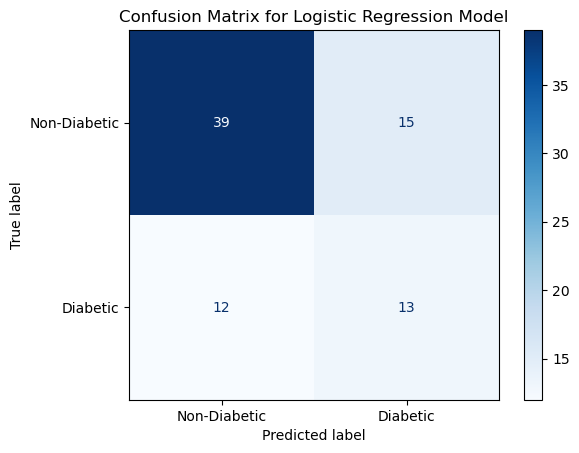

In [61]:
# Gradient Descent Parameters
learning_rate = 0.0001
n_iterations = 3000  # Number of epochs
batch_size = 20
lmbda = 0.01

# Train the logistic regression model using your SGD function
beta_gd = gd.stochastic_gradient_descent(
    X_train, y_train, initial_beta,
    learning_rate=learning_rate,
    n_iterations=n_iterations,
    model=logreg.logistic_gradient,  # Use the logistic gradient function
    batch_size=batch_size,
    lmbda=lmbda
)

# Generate predictions for the test data
y_pred_test = logreg.predict(X_test, beta_gd)

# Calculate and print the accuracy on the test set
test_accuracy = logreg.calculate_accuracy(y_test, y_pred_test)
print(f"Accuracy on the test set: {test_accuracy * 100:.2f}%")

# Calculate and print the accuracy on the training set as well
y_pred_train = logreg.predict(X_train, beta_gd)
train_accuracy = logreg.calculate_accuracy(y_train, y_pred_train)
print(f"Accuracy on the training set: {train_accuracy * 100:.2f}%")

# Generate and plot the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred_test)
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=['Non-Diabetic', 'Diabetic'])
disp.plot(cmap='Blues')
plt.title("Confusion Matrix for Logistic Regression Model")
plt.show()